In [ ]:
!pip install pyinform

     |████████████████████████████████| 131 kB 6.9 MB/s 


In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

pm = genfromtxt('C:/Users/vishn/OneDrive/Documents/BTP/FINAL/FINAL_PM2.5.csv', delimiter=',')


In [3]:
pm.shape

(52610, 268)

In [4]:
pm=pm[1:52610,1:]

In [5]:
pm

array([[   nan,  48.46,  39.26, ...,  63.  , 346.  ,  63.  ],
       [   nan,  48.46,  36.33, ...,  63.  ,    nan,  56.  ],
       [   nan,  38.61,  38.32, ..., 111.  ,    nan,  56.  ],
       ...,
       [   nan,  52.98,  66.7 , ...,  25.  ,  26.  ,    nan],
       [   nan,  52.98,  81.83, ...,  25.  ,  31.  ,    nan],
       [   nan,  74.7 ,  83.31, ...,    nan,  31.  ,    nan]])

In [6]:
import pandas as pd
pm=pd.DataFrame(pm)

In [7]:
loc_a

NameError: name 'loc_a' is not defined

In [ ]:
loc_a

In [8]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
Replicating the same formula as mentioned in Wiki
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [9]:
def find_nearest(lat, long):
    distances = loc_b.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return loc_b.loc[distances.idxmin(), 'stn_name']

In [15]:
loc_b

,ID,Station,City,Lon,Lat
0,1,Adarsh Nagar,Jaipur - RSPCB,75.836858,26.902909
1,2,Alandur Bus Depot,Chennai - CPCB,80.107654,12.909916
2,3,Alipur,Delhi - DPCC,77.153010,28.815329
3,4,Anand Kala Kshetram,Rajamahendravaram - APPCB,81.736318,16.987287
4,5,Anand Vihar,Delhi - DPCC,77.316032,28.646835
...,...,...,...,...,...
261,262,Ward 32 Bapupara,Siliguri - WBPCB,88.412668,26.688305
262,263,Wazirpur,Delhi - DPCC,77.165453,28.699793
263,264,Worli,Mumbai - MPCB,72.812811,18.993616
264,265,Yamunapuram,Bulandshahr - UPPCB,77.849831,28.406963


In [14]:
loc_b.apply(
    lambda row: find_nearest(row['Lat'], row['Lon']), axis=0)

KeyError: 'Lat'

In [ ]:
loc_b['name'] = loc_b.apply(
    lambda row: find_nearest(row['lat'], row['lon']), 
    axis=1)# To check the data frame if it has a new column of hotel name (for each and every member's location in the list)members.head()

KeyError: ignored

In [11]:
ar

,ID,Station,City,Lon,Lat
0,1,Adarsh Nagar,Jaipur - RSPCB,75.836858,26.902909
1,2,Alandur Bus Depot,Chennai - CPCB,80.107654,12.909916
2,3,Alipur,Delhi - DPCC,77.153010,28.815329
3,4,Anand Kala Kshetram,Rajamahendravaram - APPCB,81.736318,16.987287
4,5,Anand Vihar,Delhi - DPCC,77.316032,28.646835
...,...,...,...,...,...
261,262,Ward 32 Bapupara,Siliguri - WBPCB,88.412668,26.688305
262,263,Wazirpur,Delhi - DPCC,77.165453,28.699793
263,264,Worli,Mumbai - MPCB,72.812811,18.993616
264,265,Yamunapuram,Bulandshahr - UPPCB,77.849831,28.406963


In [37]:
import pandas as pd
ar=pd.read_csv('C:/Users/vishn/OneDrive/Documents/BTP/FINAL/FINAL_LATITUDE_LONGITUDE.csv')
loc_a=pd.DataFrame(ar)
loc_b=pd.DataFrame(ar)
from sklearn.neighbors import BallTree, KDTree
import numpy as np
#bt = BallTree(np.deg2rad(loc_b[['lat', 'lon']].values), metric='haversine')
kd = KDTree(loc_b[['Lat', 'Lon']].values, metric = 'minkowski')
distances1, indices1 = kd.query(loc_b[['Lat', 'Lon']],k=7)
all_stn_ind=[]
for i in range(266):
  # print(Hour_3_sample[i,:,:].shape)
  j=indices1[i]
  print(j)
  all_stn_ind.append(np.expand_dims(j,0))
all_stn_ind=np.concatenate(all_stn_ind,axis=0)
  #each_stn=[]
  # for l in j:
  #   # print(l)
  #   # print(Hour_3_sample[:,l,:].shape)
  #   each_stn.append(ar['MAE'].iloc[[l]])
  # each_stn=np.concatenate(each_stn,axis=-1)
  # # print(each_stn.shape)
  # all_stn.append(each_stn)

[  0 176 224 136 225  56 140]
[  1 171 253   7 194 104 120]
[  2 147  47  85 193  17 262]
[  3 203  65 265 198  20  27]
[  4 259  77 168  81 252 205]
[  5  86  54 264 165 103 102]
[  6 120 119 104 194   7 253]
[  7 253 104 194 120 119 171]
[  8 146 159 139  17  48  47]
[  9  80  78 207  60  37 240]
[ 10 262  85 157 182 184 222]
[ 11 242 156 218 257  75 238]
[ 12 241 110  63  99 105 151]
[ 13 254  51  84  57 163  18]
[ 14  15 234 258  32 107  28]
[ 15  14 234 107  32 258  28]
[ 16  71  88  23 170 233  69]
[ 17  47 147 193 139   2  85]
[ 18  57  51 254  13 163  84]
[ 19 247 129 189 133  98 152]
[ 20  73  27 198  74 265 109]
[ 21  22  95 118 101 138 178]
[ 21  22  95 118 101 138 178]
[ 23  88  71 233  16  26  69]
[ 24 143  82 246  64 141  76]
[ 25 108  90  49  86 264  54]
[ 26 233  23  71  88  69  16]
[ 27  73  20 198  74 265 109]
[ 28  32 258 107  14  15 178]
[ 29 240 201 196 123  60  66]
[ 30 121  83 117 237  10 182]
[ 31 130 162  20  73 198  74]
[ 32  28 107 258  14 234 178]
[ 33 115  

In [50]:
a=pm.corr(method ='pearson')

In [41]:
pm

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,NaN,48.46,39.26,279.0,NaN,978.0,109.0,NaN,NaN,249.4,...,32.0,508.80,95.0,NaN,NaN,108.40,606.0,63.0,346.0,63.0
1,NaN,48.46,36.33,261.0,NaN,737.0,124.0,NaN,NaN,249.4,...,32.0,470.80,95.0,483.0,NaN,106.10,513.0,63.0,NaN,56.0
2,NaN,38.61,38.32,261.0,NaN,496.0,124.0,NaN,NaN,245.5,...,32.0,470.80,116.0,483.0,NaN,104.80,420.0,111.0,NaN,56.0
3,NaN,38.61,45.74,267.0,66.0,449.5,110.0,NaN,NaN,245.5,...,33.0,507.80,116.0,430.5,NaN,104.10,402.5,111.0,NaN,50.0
4,NaN,53.61,45.42,267.0,66.0,403.0,110.0,NaN,NaN,225.2,...,33.0,507.80,126.0,378.0,NaN,89.10,385.0,117.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,NaN,52.90,58.42,NaN,36.0,NaN,25.0,NaN,32.0,53.2,...,NaN,71.37,50.0,NaN,NaN,184.27,NaN,24.0,32.0,NaN
52605,NaN,52.90,66.70,NaN,29.0,NaN,28.0,NaN,30.0,55.2,...,NaN,80.29,50.0,NaN,NaN,184.27,NaN,24.0,26.0,NaN
52606,NaN,52.98,66.70,NaN,29.0,NaN,28.0,NaN,30.0,57.3,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,26.0,NaN
52607,NaN,52.98,81.83,NaN,29.0,NaN,38.0,NaN,30.0,57.3,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,31.0,NaN


In [51]:

a

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.083219,0.525913,0.321029,0.486982,0.366004,0.064977,0.254549,0.528152,...,0.305425,0.539584,0.288006,0.489913,0.132866,0.216226,0.489137,0.391004,0.412268,0.417591
2,NaN,0.083219,1.000000,0.073502,0.215376,0.058969,0.018167,0.111538,0.400380,0.059380,...,0.158651,0.097874,0.074670,0.062544,0.068692,0.099433,0.067803,0.107078,0.075498,0.148566
3,NaN,0.525913,0.073502,1.000000,0.435052,0.820967,0.487998,0.077378,0.336626,0.781030,...,0.343281,0.784444,0.386193,0.867809,0.223816,0.325433,0.830712,0.518094,0.717839,0.468075
4,NaN,0.321029,0.215376,0.435052,1.000000,0.474295,0.253594,0.202891,0.523848,0.409131,...,0.448370,0.432633,0.348544,0.492672,0.172433,0.485044,0.449115,0.557729,0.468838,0.630288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,0.216226,0.099433,0.325433,0.485044,0.315457,0.021569,0.257428,0.279412,0.278475,...,0.324881,0.272922,0.290286,0.359757,0.112658,1.000000,0.329828,0.467282,0.345098,0.455249
263,NaN,0.489137,0.067803,0.830712,0.449115,0.851226,0.511222,0.094696,0.354713,0.708317,...,0.381124,0.760261,0.404695,0.854167,0.246707,0.329828,1.000000,0.532238,0.634580,0.477432
264,NaN,0.391004,0.107078,0.518094,0.557729,0.529054,0.342464,0.183289,0.386097,0.447475,...,0.401192,0.500818,0.583375,0.557385,0.184535,0.467282,0.532238,1.000000,0.544520,0.575035
265,NaN,0.412268,0.075498,0.717839,0.468838,0.683470,0.598989,0.143501,0.327738,0.631259,...,0.331355,0.657421,0.326024,0.734569,0.090894,0.345098,0.634580,0.544520,1.000000,0.476511


In [53]:
a.to_csv("corr.csv") 

In [54]:
all_stn_ind.shape

(266, 7)

In [55]:
n=all_stn_ind[2][0]
n

2

In [56]:
n=all_stn_ind[0]
n

array([  0, 176, 224, 136, 225,  56, 140], dtype=int64)

In [57]:
a[n].iloc[0]

0     NaN
176   NaN
224   NaN
136   NaN
225   NaN
56    NaN
140   NaN
Name: 0, dtype: float64

In [58]:
a

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.083219,0.525913,0.321029,0.486982,0.366004,0.064977,0.254549,0.528152,...,0.305425,0.539584,0.288006,0.489913,0.132866,0.216226,0.489137,0.391004,0.412268,0.417591
2,NaN,0.083219,1.000000,0.073502,0.215376,0.058969,0.018167,0.111538,0.400380,0.059380,...,0.158651,0.097874,0.074670,0.062544,0.068692,0.099433,0.067803,0.107078,0.075498,0.148566
3,NaN,0.525913,0.073502,1.000000,0.435052,0.820967,0.487998,0.077378,0.336626,0.781030,...,0.343281,0.784444,0.386193,0.867809,0.223816,0.325433,0.830712,0.518094,0.717839,0.468075
4,NaN,0.321029,0.215376,0.435052,1.000000,0.474295,0.253594,0.202891,0.523848,0.409131,...,0.448370,0.432633,0.348544,0.492672,0.172433,0.485044,0.449115,0.557729,0.468838,0.630288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,0.216226,0.099433,0.325433,0.485044,0.315457,0.021569,0.257428,0.279412,0.278475,...,0.324881,0.272922,0.290286,0.359757,0.112658,1.000000,0.329828,0.467282,0.345098,0.455249
263,NaN,0.489137,0.067803,0.830712,0.449115,0.851226,0.511222,0.094696,0.354713,0.708317,...,0.381124,0.760261,0.404695,0.854167,0.246707,0.329828,1.000000,0.532238,0.634580,0.477432
264,NaN,0.391004,0.107078,0.518094,0.557729,0.529054,0.342464,0.183289,0.386097,0.447475,...,0.401192,0.500818,0.583375,0.557385,0.184535,0.467282,0.532238,1.000000,0.544520,0.575035
265,NaN,0.412268,0.075498,0.717839,0.468838,0.683470,0.598989,0.143501,0.327738,0.631259,...,0.331355,0.657421,0.326024,0.734569,0.090894,0.345098,0.634580,0.544520,1.000000,0.476511


In [59]:
all_stn_ind

array([[  0, 176, 224, ..., 225,  56, 140],
       [  1, 171, 253, ..., 194, 104, 120],
       [  2, 147,  47, ..., 193,  17, 262],
       ...,
       [263, 231, 127, ...,  14, 234,  35],
       [264,   5, 102, ..., 209, 216, 205],
       [265, 198,  27, ...,  73,  74,  68]], dtype=int64)

In [60]:
n=all_stn_ind[0]
corrnew=a[all_stn_ind[0]]
corrnew.shape

(267, 7)

In [61]:
corr_list=[]
for i in range(0,266):
  corrnew=a[all_stn_ind[i]].iloc[i]
  print(corrnew.shape)
  corr_list.append(np.expand_dims(corrnew,0))
corr_list=np.concatenate(corr_list,0)

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)


In [62]:
corr_list.shape

(266, 7)

In [63]:
corr_list=pd.DataFrame(corr_list)
corr_list.to_csv("St-wise_corr_list.csv")

In [64]:
from pyinform import mutual_info
# mutual_info(pm[:,0], pm[:,3])

In [73]:
pm.iloc[:,1]

0        48.46
1        48.46
2        38.61
3        38.61
4        53.61
         ...  
52604    52.90
52605    52.90
52606    52.98
52607    52.98
52608    74.70
Name: 1, Length: 52609, dtype: float64

In [77]:
pip install pyinform

You should consider upgrading via the 'c:\Users\vishn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [95]:
import numpy as np
import pandas as pd

# assuming pm is your time series
pm1 = pm.fillna(0)  # fill missing values with 0
pm1 = pm1.astype(int)  # convert to integer
z_seq = (pm1 - pm1.mean()) / pm1.std()  # compute z-normalized time series
z_seq = np.abs(z_seq)  # convert any negative values to positive
z_seq_df = pd.DataFrame(z_seq)  # convert to DataFrame


In [90]:
z_seq

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,NaN,0.046321,0.232105,2.094223,1.020463,7.844757,0.926796,0.376999,0.752989,2.502208,...,0.495831,5.759801,0.969488,0.820597,0.545938,1.265465,5.183963,0.654330,3.151909,0.782734
1,NaN,0.046321,0.159005,1.903514,1.020463,5.707453,1.181036,0.376999,0.752989,2.502208,...,0.495831,5.258215,0.969488,3.540589,0.545938,1.223463,4.257210,0.654330,1.013996,0.542452
2,NaN,0.217802,0.207738,1.903514,1.020463,3.570149,1.181036,0.376999,0.752989,2.445359,...,0.495831,5.258215,1.358778,3.540589,0.545938,1.181461,3.330456,1.920321,1.013996,0.542452
3,NaN,0.217802,0.378305,1.967084,1.316396,3.153330,0.943745,0.376999,0.752989,2.445359,...,0.545805,5.746602,1.358778,3.062033,0.545938,1.181461,3.151084,1.920321,1.013996,0.336497
4,NaN,0.178383,0.378305,1.967084,1.316396,2.745380,0.943745,0.376999,0.752989,2.161113,...,0.545805,5.746602,1.544155,2.592505,0.545938,0.866445,2.981678,2.078570,1.013996,0.336497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,NaN,0.151970,0.695072,0.861771,0.254187,0.828618,0.496948,0.376999,0.518957,0.283400,...,1.103313,0.008442,0.135295,0.820597,0.545938,2.861545,0.854883,0.374289,0.628710,1.379799
52605,NaN,0.151970,0.890006,0.861771,0.006339,0.828618,0.446100,0.376999,0.439460,0.254975,...,1.103313,0.110355,0.135295,0.820597,0.545938,2.861545,0.854883,0.374289,0.700951,1.379799
52606,NaN,0.151970,0.890006,0.861771,0.006339,0.828618,0.446100,0.376999,0.439460,0.226550,...,1.103313,0.176353,0.246521,0.820597,0.545938,1.832493,0.854883,0.347914,0.700951,1.379799
52607,NaN,0.151970,1.255507,0.861771,0.006339,0.828618,0.276606,0.376999,0.439460,0.226550,...,1.103313,0.176353,0.246521,0.820597,0.545938,1.832493,0.854883,0.347914,0.640750,1.379799


In [96]:
z_seq_df

z_seq_df = z_seq_df.fillna(0)
z_seq_df

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.046321,0.232105,2.094223,1.020463,7.844757,0.926796,0.376999,0.752989,2.502208,...,0.495831,5.759801,0.969488,0.820597,0.545938,1.265465,5.183963,0.654330,3.151909,0.782734
1,0.0,0.046321,0.159005,1.903514,1.020463,5.707453,1.181036,0.376999,0.752989,2.502208,...,0.495831,5.258215,0.969488,3.540589,0.545938,1.223463,4.257210,0.654330,1.013996,0.542452
2,0.0,0.217802,0.207738,1.903514,1.020463,3.570149,1.181036,0.376999,0.752989,2.445359,...,0.495831,5.258215,1.358778,3.540589,0.545938,1.181461,3.330456,1.920321,1.013996,0.542452
3,0.0,0.217802,0.378305,1.967084,1.316396,3.153330,0.943745,0.376999,0.752989,2.445359,...,0.545805,5.746602,1.358778,3.062033,0.545938,1.181461,3.151084,1.920321,1.013996,0.336497
4,0.0,0.178383,0.378305,1.967084,1.316396,2.745380,0.943745,0.376999,0.752989,2.161113,...,0.545805,5.746602,1.544155,2.592505,0.545938,0.866445,2.981678,2.078570,1.013996,0.336497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,0.0,0.151970,0.695072,0.861771,0.254187,0.828618,0.496948,0.376999,0.518957,0.283400,...,1.103313,0.008442,0.135295,0.820597,0.545938,2.861545,0.854883,0.374289,0.628710,1.379799
52605,0.0,0.151970,0.890006,0.861771,0.006339,0.828618,0.446100,0.376999,0.439460,0.254975,...,1.103313,0.110355,0.135295,0.820597,0.545938,2.861545,0.854883,0.374289,0.700951,1.379799
52606,0.0,0.151970,0.890006,0.861771,0.006339,0.828618,0.446100,0.376999,0.439460,0.226550,...,1.103313,0.176353,0.246521,0.820597,0.545938,1.832493,0.854883,0.347914,0.700951,1.379799
52607,0.0,0.151970,1.255507,0.861771,0.006339,0.828618,0.276606,0.376999,0.439460,0.226550,...,1.103313,0.176353,0.246521,0.820597,0.545938,1.832493,0.854883,0.347914,0.640750,1.379799


In [97]:
corr=np.zeros((266,266))
for i in range(266):
  for j in range(266):
    corr[i,j]=mutual_info(z_seq_df.iloc[:,i], z_seq_df.iloc[:,j])

In [98]:
corr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.9249377 , 0.003892  , ..., 0.03898159, 0.02006835,
        0.02439285],
       [0.        , 0.003892  , 0.37105726, ..., 0.00337012, 0.00364397,
        0.00210453],
       ...,
       [0.        , 0.03898159, 0.00337012, ..., 0.77260206, 0.04265063,
        0.09793622],
       [0.        , 0.02006835, 0.00364397, ..., 0.04265063, 1.13540274,
        0.03261429],
       [0.        , 0.02439285, 0.00210453, ..., 0.09793622, 0.03261429,
        0.90167431]])

<Axes: >

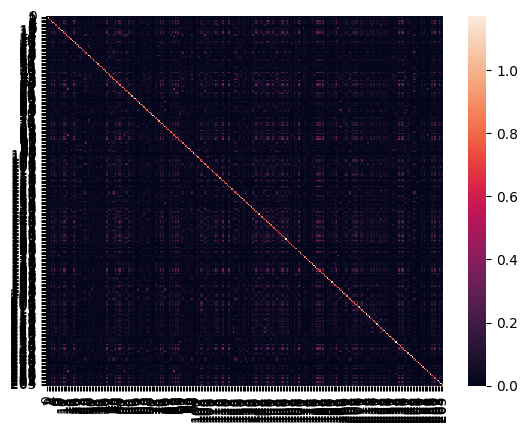

In [99]:
import seaborn as sns
import pandas as pd
corr=pd.DataFrame(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [100]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

In [103]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

In [107]:
labels = fcluster(Z, 1.24, criterion='distance')
labels

array([68, 58, 68,  3, 41,  3, 24, 68, 39, 13, 61,  3,  2, 25, 57, 69, 48,
       37,  3, 43, 49, 29, 48, 51, 68, 23, 26, 68, 31, 51, 28,  9, 65, 54,
       71, 34, 53, 65, 66, 48,  1, 23, 51, 35, 26, 23,  1, 44,  3,  2, 26,
       14, 57, 25, 23,  6, 74, 10, 43, 62, 68, 28, 22, 65,  8, 44, 42, 28,
       26, 35, 33, 76, 33, 14, 29, 30,  2, 43,  2, 28, 48, 67,  4, 44,  2,
       57,  3, 14,  1, 35, 25, 26, 48, 48, 20, 77, 51, 23, 75, 68,  7, 53,
       51,  4,  4, 68, 25, 46, 53,  9, 65,  7, 48,  1,  4, 24, 71, 53,  1,
       48, 68, 68,  1, 68, 72, 24, 23, 23, 51, 12, 49, 50, 14, 23, 49, 20,
       65, 59, 25, 51,  3, 14, 44, 14, 43, 25, 24,  2,  3, 15, 51,  2,  9,
       53, 23, 14, 14,  5,  3, 25, 27,  1, 24, 65, 43, 68,  6, 46, 68,  1,
       20, 68, 39, 53, 72, 68, 79, 65, 12, 52, 21,  3,  1,  1, 68,  2, 46,
       68, 45, 65, 49, 16, 68, 14,  3, 39, 28, 28, 44, 32,  4,  9, 28, 23,
       41,  4,  4,  5,  4, 72, 14,  4, 19, 48, 17, 26, 63, 14, 24, 14, 64,
       19, 80,  6, 24, 58

In [106]:
Z

array([[0.00000000e+00, 1.68000000e+02, 9.93778315e-02, 2.00000000e+00],
       [1.40000000e+01, 2.55000000e+02, 4.19869212e-01, 2.00000000e+00],
       [9.90000000e+01, 2.66000000e+02, 4.45954371e-01, 3.00000000e+00],
       ...,
       [5.24000000e+02, 5.26000000e+02, 5.20283584e+00, 1.77000000e+02],
       [5.27000000e+02, 5.28000000e+02, 6.73334390e+00, 2.32000000e+02],
       [5.09000000e+02, 5.29000000e+02, 1.22031192e+01, 2.66000000e+02]])

In [105]:
Z = linkage(corr, 'ward')

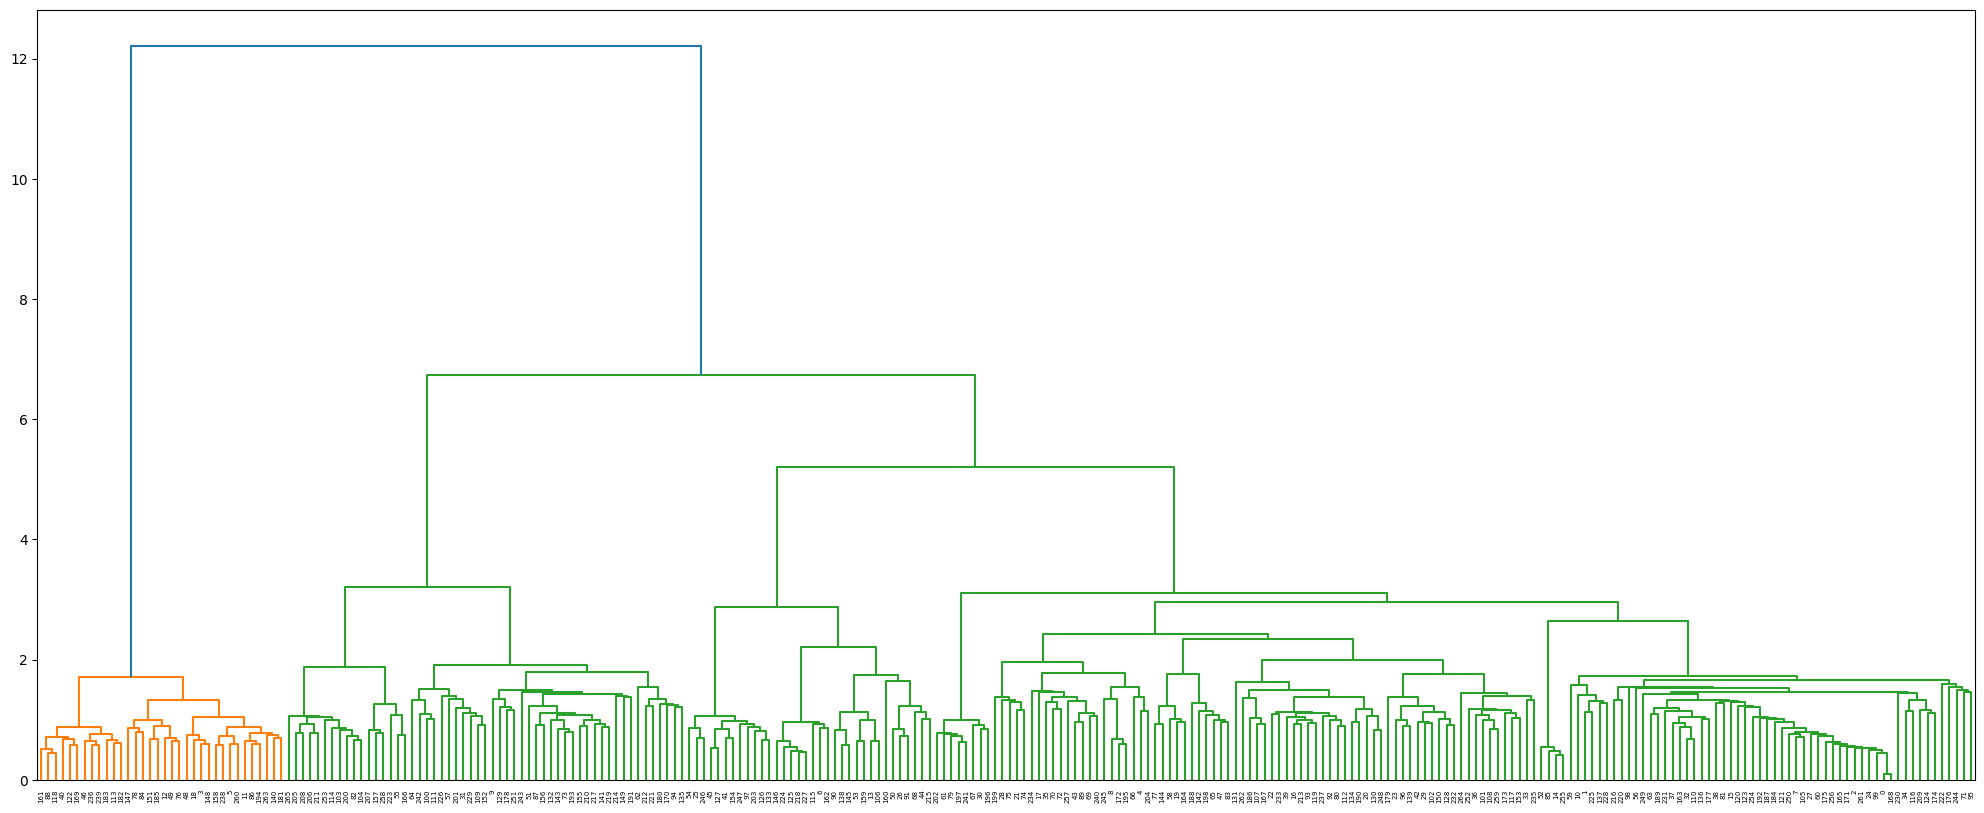

In [108]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [110]:
import pandas as pd
from datetime import datetime
# h=pd.date_range(start="2018-01-01",end="2020-12-31", freq='3H').to_pydatetime().tolist()
# h=h[:8756]
# h=pd.DataFrame(h)
# import numpy as np
# sam=np.load("/content/drive/MyDrive/Delhi Lockdown/DelhiData_3hr_sample_V9_Eju.npy")
# pm=sam[:,:,0]
# # pm
ar=pd.read_csv('C:/Users/vishn/OneDrive/Documents/BTP/FINAL/FINAL_LATITUDE_LONGITUDE.csv')

loc_b=pd.DataFrame(ar)

In [111]:
ar

,ID,Station,City,Lon,Lat
0,1,Adarsh Nagar,Jaipur - RSPCB,75.836858,26.902909
1,2,Alandur Bus Depot,Chennai - CPCB,80.107654,12.909916
2,3,Alipur,Delhi - DPCC,77.153010,28.815329
3,4,Anand Kala Kshetram,Rajamahendravaram - APPCB,81.736318,16.987287
4,5,Anand Vihar,Delhi - DPCC,77.316032,28.646835
...,...,...,...,...,...
261,262,Ward 32 Bapupara,Siliguri - WBPCB,88.412668,26.688305
262,263,Wazirpur,Delhi - DPCC,77.165453,28.699793
263,264,Worli,Mumbai - MPCB,72.812811,18.993616
264,265,Yamunapuram,Bulandshahr - UPPCB,77.849831,28.406963


In [115]:
pm = pm.drop(pm.columns[0], axis=1)
pm

,1,2,3,4,5,6,7,8,9,10,...,257,258,259,260,261,262,263,264,265,266
0,48.46,39.26,279.0,NaN,978.0,109.0,NaN,NaN,249.4,121.80,...,32.0,508.80,95.0,NaN,NaN,108.40,606.0,63.0,346.0,63.0
1,48.46,36.33,261.0,NaN,737.0,124.0,NaN,NaN,249.4,121.80,...,32.0,470.80,95.0,483.0,NaN,106.10,513.0,63.0,NaN,56.0
2,38.61,38.32,261.0,NaN,496.0,124.0,NaN,NaN,245.5,116.40,...,32.0,470.80,116.0,483.0,NaN,104.80,420.0,111.0,NaN,56.0
3,38.61,45.74,267.0,66.0,449.5,110.0,NaN,NaN,245.5,116.40,...,33.0,507.80,116.0,430.5,NaN,104.10,402.5,111.0,NaN,50.0
4,53.61,45.42,267.0,66.0,403.0,110.0,NaN,NaN,225.2,114.50,...,33.0,507.80,126.0,378.0,NaN,89.10,385.0,117.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,52.90,58.42,NaN,36.0,NaN,25.0,NaN,32.0,53.2,111.39,...,NaN,71.37,50.0,NaN,NaN,184.27,NaN,24.0,32.0,NaN
52605,52.90,66.70,NaN,29.0,NaN,28.0,NaN,30.0,55.2,111.34,...,NaN,80.29,50.0,NaN,NaN,184.27,NaN,24.0,26.0,NaN
52606,52.98,66.70,NaN,29.0,NaN,28.0,NaN,30.0,57.3,109.84,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,26.0,NaN
52607,52.98,81.83,NaN,29.0,NaN,38.0,NaN,30.0,57.3,NaN,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,31.0,NaN


In [116]:
pm=pd.DataFrame(pm)
pm.columns=loc_b['Station']

In [117]:
pm.columns=loc_b['Station']

In [118]:
pm

Station,Adarsh Nagar,Alandur Bus Depot,Alipur,Anand Kala Kshetram,Anand Vihar,Anand Vihar,Anthoni Pillai Nagar,Arumbakkam,Arya Nagar,Ashok Nagar,...,Vijay Nagar,Vikas Sadan,Vile Parle West,Vivek Vihar,Vyttila,Ward 32 Bapupara,Wazirpur,Worli,Yamunapuram,Zoo Park
0,48.46,39.26,279.0,NaN,978.0,109.0,NaN,NaN,249.4,121.80,...,32.0,508.80,95.0,NaN,NaN,108.40,606.0,63.0,346.0,63.0
1,48.46,36.33,261.0,NaN,737.0,124.0,NaN,NaN,249.4,121.80,...,32.0,470.80,95.0,483.0,NaN,106.10,513.0,63.0,NaN,56.0
2,38.61,38.32,261.0,NaN,496.0,124.0,NaN,NaN,245.5,116.40,...,32.0,470.80,116.0,483.0,NaN,104.80,420.0,111.0,NaN,56.0
3,38.61,45.74,267.0,66.0,449.5,110.0,NaN,NaN,245.5,116.40,...,33.0,507.80,116.0,430.5,NaN,104.10,402.5,111.0,NaN,50.0
4,53.61,45.42,267.0,66.0,403.0,110.0,NaN,NaN,225.2,114.50,...,33.0,507.80,126.0,378.0,NaN,89.10,385.0,117.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,52.90,58.42,NaN,36.0,NaN,25.0,NaN,32.0,53.2,111.39,...,NaN,71.37,50.0,NaN,NaN,184.27,NaN,24.0,32.0,NaN
52605,52.90,66.70,NaN,29.0,NaN,28.0,NaN,30.0,55.2,111.34,...,NaN,80.29,50.0,NaN,NaN,184.27,NaN,24.0,26.0,NaN
52606,52.98,66.70,NaN,29.0,NaN,28.0,NaN,30.0,57.3,109.84,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,26.0,NaN
52607,52.98,81.83,NaN,29.0,NaN,38.0,NaN,30.0,57.3,NaN,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,31.0,NaN


In [121]:
a=np.linspace(1, 266,dtype = int, num=266)
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [122]:
pm=pd.DataFrame(pm)
pm.columns=a

In [123]:
pm

,1,2,3,4,5,6,7,8,9,10,...,257,258,259,260,261,262,263,264,265,266
0,48.46,39.26,279.0,NaN,978.0,109.0,NaN,NaN,249.4,121.80,...,32.0,508.80,95.0,NaN,NaN,108.40,606.0,63.0,346.0,63.0
1,48.46,36.33,261.0,NaN,737.0,124.0,NaN,NaN,249.4,121.80,...,32.0,470.80,95.0,483.0,NaN,106.10,513.0,63.0,NaN,56.0
2,38.61,38.32,261.0,NaN,496.0,124.0,NaN,NaN,245.5,116.40,...,32.0,470.80,116.0,483.0,NaN,104.80,420.0,111.0,NaN,56.0
3,38.61,45.74,267.0,66.0,449.5,110.0,NaN,NaN,245.5,116.40,...,33.0,507.80,116.0,430.5,NaN,104.10,402.5,111.0,NaN,50.0
4,53.61,45.42,267.0,66.0,403.0,110.0,NaN,NaN,225.2,114.50,...,33.0,507.80,126.0,378.0,NaN,89.10,385.0,117.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,52.90,58.42,NaN,36.0,NaN,25.0,NaN,32.0,53.2,111.39,...,NaN,71.37,50.0,NaN,NaN,184.27,NaN,24.0,32.0,NaN
52605,52.90,66.70,NaN,29.0,NaN,28.0,NaN,30.0,55.2,111.34,...,NaN,80.29,50.0,NaN,NaN,184.27,NaN,24.0,26.0,NaN
52606,52.98,66.70,NaN,29.0,NaN,28.0,NaN,30.0,57.3,109.84,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,26.0,NaN
52607,52.98,81.83,NaN,29.0,NaN,38.0,NaN,30.0,57.3,NaN,...,NaN,85.97,56.0,NaN,NaN,135.37,NaN,25.0,31.0,NaN


In [124]:
pm = pd.to_numeric(pm)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
# pm=pm.T

In [125]:
co=pm.corr()

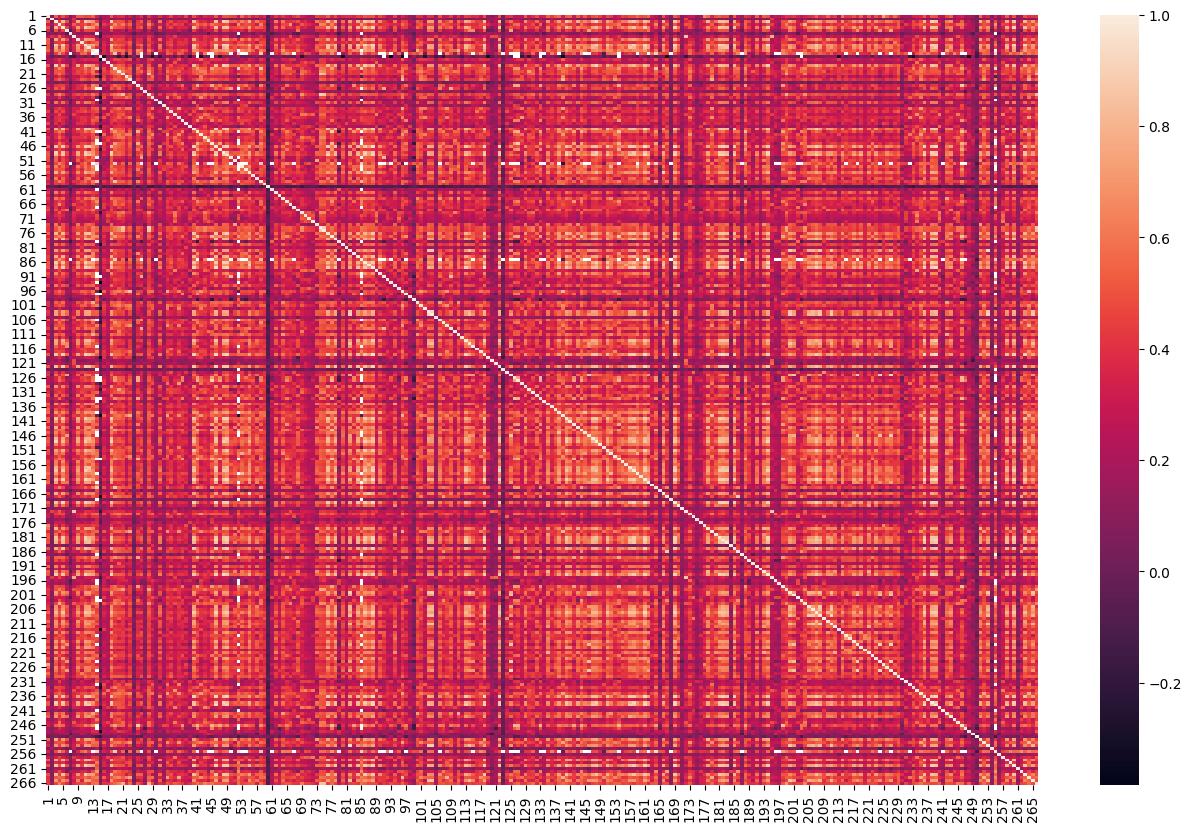

In [131]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import numpy as np
# import datetime as dt
# from datetime import timedelta
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score,silhouette_samples
# from sklearn.linear_model import LinearRegression,Ridge,Lasso
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
# from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
# from fbprophet import Prophet
# from sklearn.preprocessing import PolynomialFeatures
# from statsmodels.tsa.stattools import adfuller
fig, ax = plt.subplots(figsize=(16,10))
snsplot=sns.heatmap(co,ax=ax)
fig = snsplot.get_figure()

fig.savefig("C:/Users/vishn/OneDrive/Documents/BTP/CODES/CLUSTERINGI/corr1.png")


In [132]:
fig.savefig("C:/Users/vishn/OneDrive/Documents/BTP/CODES/CLUSTERINGI/corr.pdf")


In [133]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1000,n_init=10,random_state=32)
    kmeans.fit(pm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig("/content/drive/MyDrive/Delhi_Model_Results/elbow.pdf")
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# y_kmeans = kmeans.fit_predict(pm)

pm= pm.as_matrix(columns=None)

AttributeError: ignored

In [ ]:
pm

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,311.267760,754.0,139.792878,325.00,284.938872,172.150000,295.06,317.136795,381.00,268.651196,...,291.154397,234.080000,578.000000,195.253309,436.100000,425.0,201.537665,305.954204,225.840870,290.173992
1,291.251693,754.0,145.161783,240.65,254.243000,172.900000,330.39,325.366733,310.00,225.196653,...,277.556986,223.880000,578.000000,188.117688,433.500000,426.0,199.995885,307.359350,224.334341,275.422417
2,287.456695,754.0,141.572959,174.49,251.868466,157.040000,395.56,335.250892,299.50,240.238645,...,276.340627,212.340000,520.000000,174.985365,439.050000,520.5,194.193474,309.939406,221.072367,242.517311
3,280.069610,754.0,145.506031,146.37,241.873461,150.220000,461.26,351.922428,288.00,201.338468,...,262.945445,221.970000,520.000000,165.984094,442.300000,523.0,199.197558,298.955543,221.064415,227.415251
4,282.609754,868.0,147.412979,153.33,240.332270,172.010000,443.75,357.447002,265.00,224.673950,...,269.044595,229.800000,456.000000,161.830994,448.050000,462.5,201.782457,293.628858,223.019746,242.854080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52530,119.347373,217.0,45.687557,87.21,129.466972,87.536295,135.53,118.692063,151.45,257.183828,...,124.019261,103.710000,168.000000,116.815673,21.740000,149.0,117.387506,115.063136,116.655945,167.718082
52531,119.194401,219.5,46.209010,130.03,129.463377,87.593090,136.48,119.173424,151.00,248.334189,...,124.801967,111.010000,173.000000,90.008484,21.770000,149.0,119.100238,121.372639,118.361072,174.931930
52532,120.251073,222.0,44.510838,141.19,131.708258,86.620515,142.04,118.707909,158.00,240.481301,...,127.429890,120.910000,178.000000,125.302678,22.290000,161.0,120.524734,129.036515,120.759378,172.427930
52533,132.642038,211.0,133.839458,128.88,141.697726,123.725129,144.98,119.493523,158.10,257.665554,...,133.120670,136.568865,173.011619,127.821492,22.290000,163.0,125.498048,132.833336,125.513151,156.716101


In [ ]:
def doKmeans(X, nclust=8):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(pm, 3)
# kmeans = pd.DataFrame(clust_labels)
# print(kmeans)
pm["kmeans"]=clust_labels

In [ ]:
pm["kmeans"]

In [ ]:
s

In [ ]:
loc_b["kmeans"]=s

In [ ]:
loc_b

,id,stn_name,lat,lon,kmeans
0,0,Alipur,28.815329,77.153010,1.0
1,1,Anand.Vihar,28.646835,77.316032,0.0
2,2,Ashok.Vihar,28.695381,77.181665,1.0
3,3,Aya.Nagar,28.470691,77.109936,2.0
4,4,Bawana,28.776200,77.051074,2.0
5,5,Burari.Crossing,28.725650,77.201157,2.0
6,6,CRRI.Mathura.Road,28.551201,77.273574,0.0
7,7,Dr..Karni.Singh.Shooting.Range,28.498571,77.264840,2.0
8,8,DTU,28.750050,77.111261,0.0
9,9,Dwarka,28.571027,77.071901,1.0


In [ ]:
s

array([1., 0., 1., 2., 2., 2., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 2.,
       1., 0., 1., 1., 1., 1., 0., 2., 2., 1., 0., 1., 2., 0., 1., 2., 0.,
       1., 1., 1., 2.])

In [ ]:
loc_b1=loc_b

In [ ]:
def regioncolors(counter):
    if counter['kmeans'] == 0:
        return 'green'
    elif counter['kmeans'] == 1:
        return 'blue'
    elif counter['kmeans'] == 2:
        return 'red'
    else:
        return 'darkblue'
loc_b1["color"] = loc_b1.apply(regioncolors, axis=1)
loc_b1.head()

,id,stn_name,lat,lon,kmeans,color
0,0,Alipur,28.815329,77.153010,1.0,blue
1,1,Anand.Vihar,28.646835,77.316032,0.0,green
2,2,Ashok.Vihar,28.695381,77.181665,1.0,blue
3,3,Aya.Nagar,28.470691,77.109936,2.0,red
4,4,Bawana,28.776200,77.051074,2.0,red


In [ ]:
ss=pm.groupby('kmeans').mean()


In [ ]:
ss

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8715,8716,8717,8718,8719,8720,8721,8722,8723,8724,8725,8726,8727,8728,8729,8730,8731,8732,8733,8734,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744,8745,8746,8747,8748,8749,8750,8751,8752,8753,8754
kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,279.799224,329.393682,244.410176,267.928416,284.215161,278.404815,312.698104,324.883568,313.617910,265.664857,237.947612,268.994892,307.559394,324.342313,340.628212,371.656582,242.744730,177.057856,178.972830,226.814167,256.863586,241.428237,280.640338,324.302437,326.444635,225.255394,153.496995,206.091296,276.728267,338.608086,328.050678,330.881151,249.117037,207.628885,194.414815,263.268212,312.487658,271.512400,283.922753,303.344786,...,199.073095,101.312137,73.882778,172.604259,257.639974,259.486481,239.988754,207.770926,227.153241,141.160556,105.814358,206.714586,318.256926,309.178922,288.914924,298.796629,330.466370,264.678565,165.870202,216.941111,139.012420,85.927405,115.296296,130.085741,92.644640,58.033457,39.477641,94.506761,146.002812,127.159597,117.702593,159.156757,152.747002,111.702966,95.795421,123.712037,158.068784,128.326667,127.226840,147.643977
1,230.001226,212.042136,174.340876,193.260476,179.994987,152.948578,181.867301,175.083744,150.105389,140.404025,135.576005,162.948263,169.111562,161.926473,185.091689,200.419236,141.446720,109.630467,119.182029,135.876877,149.092658,138.832146,171.993840,191.708783,170.695613,117.237940,110.952448,138.289517,150.801723,170.312596,202.224521,208.231986,159.253673,131.208064,134.729408,164.613608,180.282379,164.124432,199.406725,191.987706,...,149.515284,88.747156,71.913080,127.847321,166.704109,157.701679,140.136492,139.998909,143.363222,96.444278,81.541414,150.455214,218.135482,191.822285,164.594935,178.815430,181.478642,130.975017,100.548691,143.630336,136.571918,120.801506,114.276389,121.006320,105.367796,74.328976,64.065902,102.805790,131.581204,120.032431,109.721380,126.311896,125.084372,87.141548,79.839537,116.028235,125.769857,123.556181,108.675888,115.573055
2,257.780993,271.301042,180.359903,207.447229,236.328212,213.682049,249.379325,262.819370,222.451085,218.021494,210.364024,229.595478,224.606799,216.698793,216.683691,248.234571,177.886141,128.368009,133.099761,159.700870,193.075317,188.394387,220.034168,223.546845,196.695769,134.426106,101.741524,147.776978,192.338105,250.359006,248.446105,230.078650,178.569801,154.423348,140.607703,192.253561,218.695529,205.602600,238.412741,239.340160,...,158.399209,93.297565,68.984827,128.129706,191.375088,196.735762,167.766910,149.941824,159.301718,105.796534,85.535799,154.749996,243.334463,230.024336,206.234992,211.768550,220.117389,171.132332,130.108087,168.446168,117.002158,92.697818,100.556946,114.370129,93.128782,61.277920,48.979851,81.702467,125.394469,111.065359,102.707193,123.890509,128.063492,95.108145,72.247050,91.921275,110.952227,105.030380,97.477937,109.671962


In [ ]:
sns.catplot(x='kmeans', data=pm, kind='bar');


In [ ]:
Cluster0=np.where(pm["kmeans"]==0)
Cluster1=np.where(pm["kmeans"]==1)
Cluster2=np.where(pm["kmeans"]==2)


In [ ]:
Cluster0

(array([ 1,  6,  8, 13, 27, 30]),)

In [ ]:
np.save("/content/drive/MyDrive/Delhi_Model_Results/Cluster0.npy", Cluster0)
np.save("/content/drive/MyDrive/Delhi_Model_Results/Cluster1.npy", Cluster1)
np.save("/content/drive/MyDrive/Delhi_Model_Results/Cluster2.npy", Cluster2)

In [ ]:
import numpy as np

c0=np.load("/content/drive/MyDrive/Delhi_Model_Results/Cluster0.npy")
c1=np.load("/content/drive/MyDrive/Delhi_Model_Results/Cluster1.npy")
c2=np.load("/content/drive/MyDrive/Delhi_Model_Results/Cluster2.npy")

In [ ]:
c0

array([[ 1,  6,  8, 13, 18, 23, 27, 30, 33]])

In [ ]:
asa =np.asarray(pm.mean(axis=1))

In [ ]:
asa=pd.DataFrame(asa)
# asa.columns=loc_b['stn_name']

In [ ]:
asa=asa.T

In [ ]:
asa.columns=loc_b['stn_name']

In [ ]:
asa.loc[c0]

ValueError: ignored

In [ ]:
asa[c0]

KeyError: ignored

In [ ]:
asa[c1]

array([[80.61306864, 58.28471089, 88.24515628, 76.24831605, 77.60086404,
        47.70423132, 79.18128444, 78.85222883, 79.90598899, 69.44122638,
        74.01385133, 75.64219073, 65.35659063, 74.90098222, 88.6950664 ,
        76.23246993]])

In [ ]:
asa[c2]

array([[ 83.08525332,  85.16987641,  86.41157745,  92.54242303,
         85.24519775,  83.83911926,  97.87241699,  84.07699655,
        101.77822099,  89.94066349,  78.738861  , 100.05219812,
         93.20748099]])

In [ ]:
c0=np.squeeze(c0)
c1=np.squeeze(c1)
c2=np.squeeze(c2)


In [ ]:
c2.shape

(13,)

In [ ]:
s=np.zeros(38)
# s[c0]==0
# s[c1]==1
# s[c2]==2
# s

In [ ]:
a0=np.zeros(9)
a1=np.repeat(1,16)
a2=np.repeat(2,13)

In [ ]:
aa=np.concatenate((a0,a1,a2))

In [ ]:
aa

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2.])

In [ ]:
ss=np.concatenate((c0,c1,c2))

In [ ]:
s[ss]=aa

In [ ]:
c2

array([ 3,  4,  5,  7, 10, 11, 12, 16, 24, 25, 29, 32, 37])

In [ ]:
s

array([1., 0., 1., 2., 2., 2., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 2.,
       1., 0., 1., 1., 1., 1., 0., 2., 2., 1., 0., 1., 2., 0., 1., 2., 0.,
       1., 1., 1., 2.])

In [ ]:
s=np.concatenate((c0,c1,c2),axis=1)
s=np.squeeze(s)
ss=np.argsort(s)

In [ ]:
ss

array([ 9,  0, 10, 25, 26, 27,  1, 28,  2, 11, 29, 30, 31,  3, 12, 13, 32,
       14,  4, 15, 16, 17, 18,  5, 33, 34, 19,  6, 20, 35,  7, 21, 36,  8,
       22, 23, 24, 37])

In [ ]:
loc_b1

,id,stn_name,lat,lon,kmeans,color
0,0,Alipur,28.815329,77.153010,0,green
1,1,Anand.Vihar,28.646835,77.316032,2,red
2,2,Ashok.Vihar,28.695381,77.181665,0,green
3,3,Aya.Nagar,28.470691,77.109936,1,blue
4,4,Bawana,28.776200,77.051074,0,green
5,5,Burari.Crossing,28.725650,77.201157,0,green
6,6,CRRI.Mathura.Road,28.551201,77.273574,2,red
7,7,Dr..Karni.Singh.Shooting.Range,28.498571,77.264840,1,blue
8,8,DTU,28.750050,77.111261,2,red
9,9,Dwarka,28.571027,77.071901,0,green


In [ ]:
locations=loc_b1[['lat','lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[28.498571000000002, 77.26484]

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
# affected_area = folium.Map(location=[loc_b1.lat, loc_b1.lon], zoom_start=14,max_zoom=4,min_zoom=3,
#                           tiles='cartodbpositron',height = 500,width = '70%')
# HeatMap(data=first_month[['latitude','longitude','pm25']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),
#         radius=18, max_zoom=14).add_to(affected_area)
# affected_area

In [ ]:
map = folium.Map(location=[28.498571000000002, 77.26484], zoom_start=12,tiles = 'Stamen Toner')
for point in range(0, 38):
    folium.Marker(locationlist[point], popup='ID:'+str(loc_b1['id'][point])+' '+loc_b1['stn_name'][point], icon=folium.Icon(color=loc_b1["color"][point], icon_color='white', icon='male', angle=0, prefix='fa')).add_to(map)
map

In [ ]:
affected_area

In [ ]:
!pip install pyproj

     |████████████████████████████████| 6.6 MB 4.2 MB/s 


In [ ]:
!pip install geos


     |████████████████████████████████| 400 kB 4.2 MB/s 


In [ ]:
conda install basemap

SyntaxError: ignored

In [ ]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: ignored

In [ ]:
import sys
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

ModuleNotFoundError: ignored

In [ ]:
pm=np.asarray(pm)

In [ ]:
pmc0=np.squeeze(pm[:,c0])
pmc1=np.squeeze(pm[:,c1])
pmc2=np.squeeze(pm[:,c2])

In [ ]:
np.mean(pmc0)

107.16336380518527

In [ ]:
pmc0=np.ndarray.flatten(pmc0)
pmc1=np.ndarray.flatten(pmc1)
pmc2=np.ndarray.flatten(pmc2)


In [ ]:
data=[pmc0,pmc1,pmc2]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f4f18ba5dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f18bb1e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f18bb7b90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f18bb7650>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4f18bb13d0>,
  <matplotlib.lines.Line2D at 0x7f4f18083250>]}

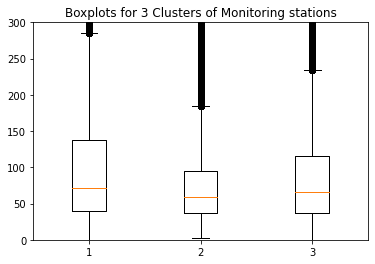

In [ ]:
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplots for 3 Clusters of Monitoring stations')
ax2.set_ylim([0,300])
ax2.boxplot(data)

In [ ]:
m0=np.mean(pmc0)
m1=np.mean(pmc1)
m2=np.mean(pmc2)
s0=np.std(pmc0)
s1=np.std(pmc1)
s2=np.std(pmc2)

In [ ]:
print(m0,m1,m2,s0,s1,s2)

107.16336380518527 74.43238919230541 89.38156041305025 104.56732584962866 55.28688067895291 79.03117739288625


In [ ]:
fig2.savefig("plot.pdf")

In [ ]:
MN=np.mean(pm.T,axis=1)

In [ ]:
SD=np.std(pm.T,axis=1)

In [ ]:
SD

array([ 61.54643131, 122.51995719,  60.13335741,  79.29791985,
        67.6801872 ,  88.37952846, 100.08572735,  72.80285001,
       113.2197633 ,  69.18807382,  68.52628752,  82.1356729 ,
        85.79758728,  99.51130273,  47.90587652,  54.72237123,
        74.85309776,  29.19085604,  91.59996239,  56.72579865,
        57.20626974,  56.12633511,  56.00763613,  97.44307144,
        76.31265369,  77.90745199,  52.61468208, 116.89437123,
        52.24590577,  79.0982853 ,  98.0086476 ,  41.92550037,
        87.19554104,  94.46956274,  46.6122858 ,  66.8600238 ,
        47.87758584,  80.23683036])

In [ ]:
A=pd.DataFrame(loc_b['lon'], loc_b['lat'])

In [ ]:
A

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=9000, min_samples=3).fit(pm.T)

In [ ]:
clustering.labels_

array([ 0, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0, -1,
        0, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1,
        0,  0,  0,  0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install libtiff

In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/Delhi/sdat_1336_1_20211008_044623705.tif')
im.show()

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

# read the image stack
img = io.imread('/content/drive/MyDrive/Delhi/sdat_1336_1_20211008_044623705.tif')
# show the image
plt.imshow(mol,cmap='gray')

ValueError: ignored